In [60]:
import boto3
import pickle

To help the team steps I followed

1. How to setup AWS account?

Just google search that and follow the below step. I got 12 free trail
https://aws.amazon.com/premiumsupport/knowledge-center/create-and-activate-aws-account/

Once I sign then i use code PCU1DK92QNSSSU to get 500 class credit in credential which I got from professor and each team member has 
500 credit

2. Steps to get the code running

I follow the step https://docs.aws.amazon.com/sagemaker/latest/dg/gs-console.html

Step 1: Create an Amazon S3 Bucket
Step 2: Create an Amazon SageMaker Notebook Instance
I need large instance for that i reach out to AWS support and cc the team in the email also.

Step 3: Create a Jupyter Notebook

Also reach out to AWS support for any issues.

I did lots of google search and listen to youtube videos to resolve any issue i encounter 
since this is the first time I am using AWS.

For Data exploration as I mention in the meeting for 2nd feb for Tuesday, I am going to replicate 

1. Summary of BGG Dataset features.(Already done)
2. Summary of features in User ratings.
3. Statistics of datasets.

from paper https://www.mdpi.com/2073-8994/12/2/210/htm

Later I will perform additional data statistics based on tueday feedback from prof.



!pwd

In [61]:
import h5py

In [62]:
import tables

In [63]:
import numpy as np

In [64]:
# download preprocessed data from S3
s3 = boto3.client('s3')

###  AWS bucket with original data

In [66]:
import pathlib 

In [69]:
if not pathlib.Path("np_games_info.zip").exists():
    bucket = 'w210-capstone-2021'
    s3.download_file(bucket, 'np_games_info.zip', './np_games_info.zip')

Unzip the file in the terminal

In [70]:
import zipfile

In [71]:
unzip = False
if unzip:
    with zipfile.ZipFile('np_games_info.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

In [7]:
with open('np_games_info.pkl', 'rb') as f:
    data = pickle.load(f)

The database comprises board games with their metadata such as title, ratings, production year, publisher, types, categories, and other details. 


The data is a numpy array, Summary of BGG dataset features

1. Game ID
2. Name of the game
3. Year released
4. Number of players, playing time, age, rating
5. Designer, Artist, Publisher
6. Type of game
7. Labels
8. Dictionary of ratings by users

In [72]:
data[0][0:7]

array([1, 'Die Macher', 1986, list(['3–5', '240', '14+', '4.34']),
       list([['Karl-Heinz Schmiel'], ['Marcus Gschwendtner', 'Harald Lieske'], ['Hans im Glück', 'Moskito Spiele']]),
       list(['Strategy']), list(['Economic', 'Negotiation', 'Political'])],
      dtype=object)

In [ ]:
data[0][-1]

In [ ]:
### Number of games
### large-scale dataset of user-game interactions from BGG for research in games. It contains 108,536 board games and 511,960 users 

In [94]:
n_games = len(data)

In [41]:
ratings_per_game = np.array([len(x[-1]) for x in data])

### Unique names

In [88]:
game_names = set(x[1] for x in data)

In [89]:
len(game_names)

104344

### Distribution of ratings per game

In [42]:
ratings_per_game.mean()

438.64040121211

In [49]:
np.histogram(ratings_per_game, bins = [0,10,100,1000,10000,100000,1000000])

(array([39296, 39480, 22154,  6835,   796,    10]),
 array([      0,      10,     100,    1000,   10000,  100000, 1000000]))

### Unique users

In [77]:
import itertools

In [84]:
users = set(itertools.chain(*(x[-1].keys() for x in data)))

In [93]:
n_users = len(users)

In [87]:
list(itertools.chain([2], [3]))

[2, 3]

## Total interactions

In [91]:
total_interactions = sum(len(x[-1]) for x in data)

## Sparsity


In [97]:
sparsity = 1 - total_interactions/(n_games * n_users)

In [98]:
from IPython.display import HTML

In [100]:
import matplotlib.pyplot as plt

In [112]:
import matplotlib as mpl

In [114]:
mpl.rc_params()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/lib/pretty.py:695: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [115]:
ss = {'axes.spines.bottom': True,
          'axes.spines.left': True,
          'axes.spines.right': False,
          'axes.spines.top': False}

In [116]:
mpl.style.use(ss)

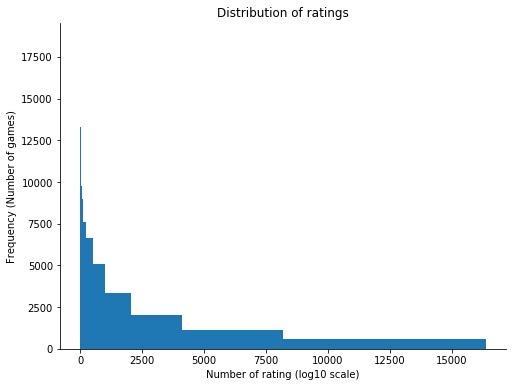

In [127]:
bins = [2**n for n in range(15)]
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
fig, ax = plt.subplots(1, 1)
ax.hist(ratings_per_game, logbins)
ax.set_title("Distribution of ratings")
ax.set_xlabel("Number of rating (log10 scale)")
ax.set_ylabel("Frequency (Number of games)")
fig.set_size_inches((8, 6))

In [124]:
max(ratings_per_game)

162219

In [128]:
import pandas as pd

In [137]:
df = pd.DataFrame({"statistic": ["number of games", "number of users", "ratings per game", "ratings per user", "total interations", "sparsity"],
              "value": [n_games, n_users, ratings_per_game.mean(), total_interactions/n_users, total_interactions, 100*sparsity]})

In [138]:
df.style.hide_index().format({"value": "{:2.2f}"})

statistic,value
number of games,108571.00
number of users,513378.00
ratings per game,438.64
ratings per user,92.77
total interations,47623627.00
sparsity,99.91
